# Financial Market Time-Series Prediction

## LSTM

### The dataset contains information about Google's stock price from the year 2012 to 2016, it has the opening stock price along with the days highs and lows and the amount of volume. We are going to use only the Opening prices for prediction

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the training set

Training_Set = pd.read_csv("Google_Stock_Price_Train.csv")

In [3]:
Training_Set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
Training_Set = Training_Set.iloc[:, 1:2].values

In [5]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
Training_Set = Scaler.fit_transform(Training_Set)

In [6]:
# Getting the inputs and outputs
# If the input is the stock price at time 't', then the output is the stock price at time (t+1)

X_train = Training_Set[0:1257]
y_train = Training_Set[1:1258]

### Reshaping the inputs - Changing the format of X_train from a 2D array to 3D array with the 3rd dimension corresponding to the time-step

In [7]:
X_train = np.reshape(X_train, (1257, 1, 1))

# Building the LSTM

In [9]:
import keras

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [11]:
# Initializing the LSTM

Regressor = Sequential()

In [12]:
# Adding the input and LSTM layer

Regressor.add(LSTM(units = 4, activation = 'tanh', input_shape = (None, 1)))

In [13]:
# Adding the output layer

Regressor.add(Dense(units = 1))

In [14]:
# Compiling the LSTM - choosing the optimizer and error function

Regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the LSTM to the train set

In [15]:
Regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 2s 1ms/step - loss: 0.2195
Epoch 2/200
1257/1257 [==============================] - 0s 94us/step - loss: 0.1521
Epoch 3/200
1257/1257 [==============================] - 0s 91us/step - loss: 0.1036
Epoch 4/200
1257/1257 [==============================] - 0s 98us/step - loss: 0.0712
Epoch 5/200
1257/1257 [==============================] - 0s 105us/step - loss: 0.0513
Epoch 6/200
1257/1257 [==============================] - 0s 97us/step - loss: 0.0397
Epoch 7/200
1257/1257 [==============================] - 0s 92us/step - loss: 0.0333
Epoch 8/200
1257/1257 [==============================] - 0s 95us/step - loss: 0.0295
Epoch 9/200
1257/1257 [==============================] - 0s 101us/step - loss: 0.0268
Epoch 10/200
1257/1257 [==============================] - 0s 91us/step - loss: 0.0246
Epoch 11/200
1257/1257 [==============================] - 0s 102us/step - loss: 0.0224
Epoch 12/200
1257/1257 [==============================] - 0s 

1257/1257 [==============================] - 0s 95us/step - loss: 2.7689e-04
Epoch 92/200
1257/1257 [==============================] - 0s 96us/step - loss: 2.7681e-04
Epoch 93/200
1257/1257 [==============================] - 0s 93us/step - loss: 2.7792e-04
Epoch 94/200
1257/1257 [==============================] - 0s 95us/step - loss: 2.7689e-04
Epoch 95/200
1257/1257 [==============================] - 0s 119us/step - loss: 2.7476e-04
Epoch 96/200
1257/1257 [==============================] - 0s 108us/step - loss: 2.7316e-04
Epoch 97/200
1257/1257 [==============================] - 0s 113us/step - loss: 2.7462e-04
Epoch 98/200
1257/1257 [==============================] - 0s 124us/step - loss: 2.7293e-04
Epoch 99/200
1257/1257 [==============================] - 0s 97us/step - loss: 2.7252e-04
Epoch 100/200
1257/1257 [==============================] - 0s 89us/step - loss: 2.7203e-04
Epoch 101/200
1257/1257 [==============================] - 0s 101us/step - loss: 2.7167e-04
Epoch 102/200
12

1257/1257 [==============================] - 0s 101us/step - loss: 2.6763e-04
Epoch 181/200
1257/1257 [==============================] - 0s 114us/step - loss: 2.6846e-04
Epoch 182/200
1257/1257 [==============================] - 0s 147us/step - loss: 2.6855e-04
Epoch 183/200
1257/1257 [==============================] - 0s 97us/step - loss: 2.6782e-04
Epoch 184/200
1257/1257 [==============================] - 0s 98us/step - loss: 2.6708e-04
Epoch 185/200
1257/1257 [==============================] - 0s 101us/step - loss: 2.6866e-04
Epoch 186/200
1257/1257 [==============================] - 0s 95us/step - loss: 2.7174e-04
Epoch 187/200
1257/1257 [==============================] - 0s 91us/step - loss: 2.7383e-04
Epoch 188/200
1257/1257 [==============================] - 0s 95us/step - loss: 2.6469e-04
Epoch 189/200
1257/1257 [==============================] - 0s 102us/step - loss: 2.6648e-04
Epoch 190/200
1257/1257 [==============================] - 0s 96us/step - loss: 2.6448e-04
Epoch 19

# Making the predictions and visualizing the results



In [16]:
# Getting the stock price of 2017 which is in the Google_Stock_Price_Test.csv file

Test_Set = pd.read_csv("Google_Stock_Price_Test.csv")
Real_Stock_Price = Test_Set.iloc[:, 1:2].values

In [18]:
Inputs = Real_Stock_Price
Inputs = Scaler.transform(Inputs)

# Reshaping the inputs

Inputs = np.reshape(Inputs, (20, 1, 1))

In [19]:
Predicted_Stock_Price = Regressor.predict(Inputs)

In [20]:
Predicted_Stock_Price = Scaler.inverse_transform(Predicted_Stock_Price)

In [21]:
Predicted_Stock_Price

array([[ 775.8505249 ],
       [ 784.34130859],
       [ 782.32104492],
       [ 790.42858887],
       [ 800.17279053],
       [ 801.44232178],
       [ 798.95391846],
       [ 800.81646729],
       [ 801.11212158],
       [ 800.76428223],
       [ 799.65936279],
       [ 799.05847168],
       [ 800.61645508],
       [ 800.91204834],
       [ 813.90264893],
       [ 820.15368652],
       [ 827.09594727],
       [ 824.47460938],
       [ 807.3314209 ],
       [ 791.83447266]], dtype=float32)

# Visualizing the results

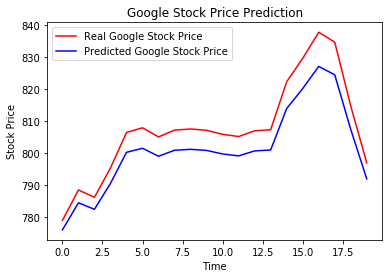

In [22]:
plt.plot(Real_Stock_Price, color = 'red', label = "Real Google Stock Price")
plt.plot(Predicted_Stock_Price, color = 'blue', label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()

In [28]:
# Evaluating the LSTM

import math
from sklearn.metrics import mean_squared_error
MSE = math.sqrt(mean_squared_error(Real_Stock_Price, Predicted_Stock_Price))
MSE = (MSE/800) * 100 # 800 is the average value of the Google stock price
MSE

0.8442458075037889

# Conclusion: -
## One has to take note that this is a "One-time-step" prediction, meaning that we can only predict the stock price of next day if we have its price the previous day. This will not help us make money, but is a good tool to know xD